# Лабораторна робота 2.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [454]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

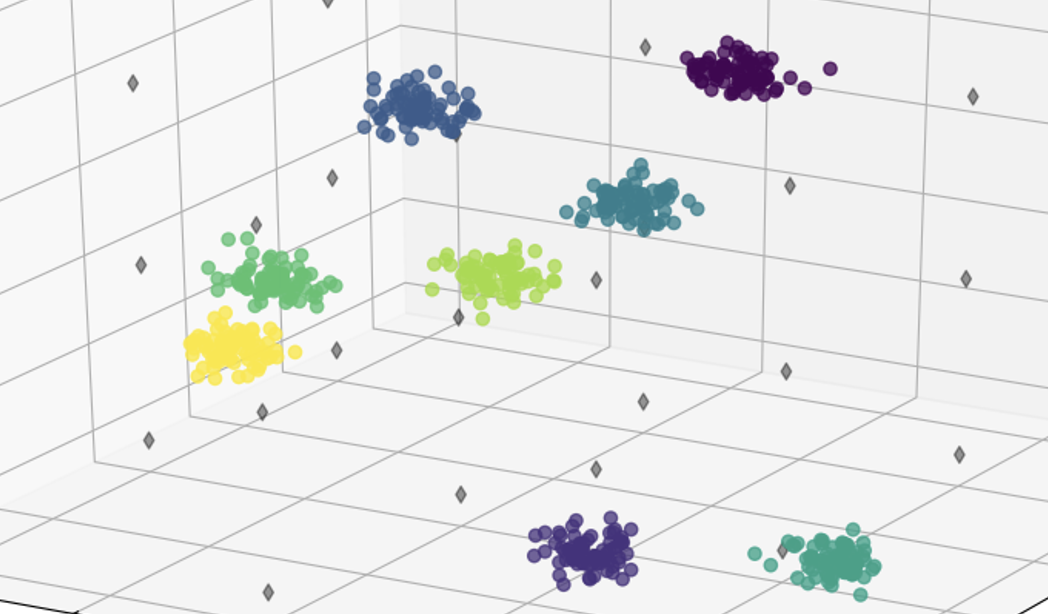

In [455]:
np.random.seed(0)

class1_x1 = np.random.normal(loc=2.0, scale=0.5, size=500)
class1_x2 = np.random.normal(loc=2.0, scale=0.5, size=500)
class1_labels = np.zeros(500, dtype=int)

class2_x1 = np.random.normal(loc=5.0, scale=0.5, size=500)
class2_x2 = np.random.normal(loc=5.0, scale=0.5, size=500)
class2_labels = np.ones(500, dtype=int)

data = {
    'Feature1': np.concatenate((class1_x1, class2_x1)),
    'Feature2': np.concatenate((class1_x2, class2_x2)),
    'Class': np.concatenate((class1_labels, class2_labels))
}

df = pd.DataFrame(data)

df.to_csv('1000points.csv', index=False)

In [456]:
df = pd.read_csv("1000points.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  1000 non-null   float64
 1   Feature2  1000 non-null   float64
 2   Class     1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB
None


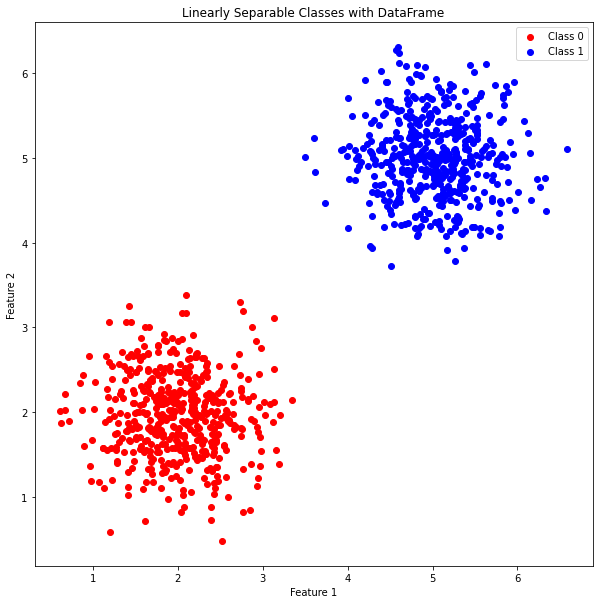

In [457]:
plt.figure(figsize=(10, 10))

plt.scatter(df[df['Class'] == 0]['Feature1'], df[df['Class'] == 0]['Feature2'], color='red', label='Class 0')
plt.scatter(df[df['Class'] == 1]['Feature1'], df[df['Class'] == 1]['Feature2'], color='blue', label='Class 1')


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Classes with DataFrame')
plt.legend()

plt.show()

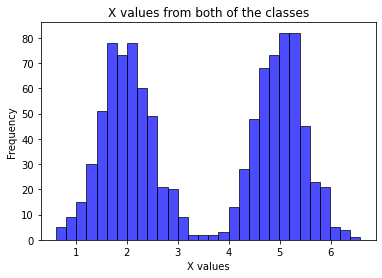

In [458]:
plt.hist(df['Feature1'], bins=30, color='blue', alpha=0.7, edgecolor='black')

plt.title('X values from both of the classes')
plt.xlabel('X values')
plt.ylabel('Frequency')
plt.show()

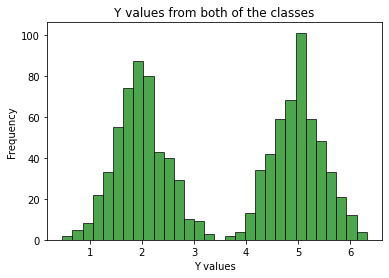

In [459]:
plt.hist(df['Feature2'], bins=30, color='green', alpha=0.7, edgecolor='black')

plt.title('Y values from both of the classes')
plt.xlabel('Y values')
plt.ylabel('Frequency')
plt.show()

**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

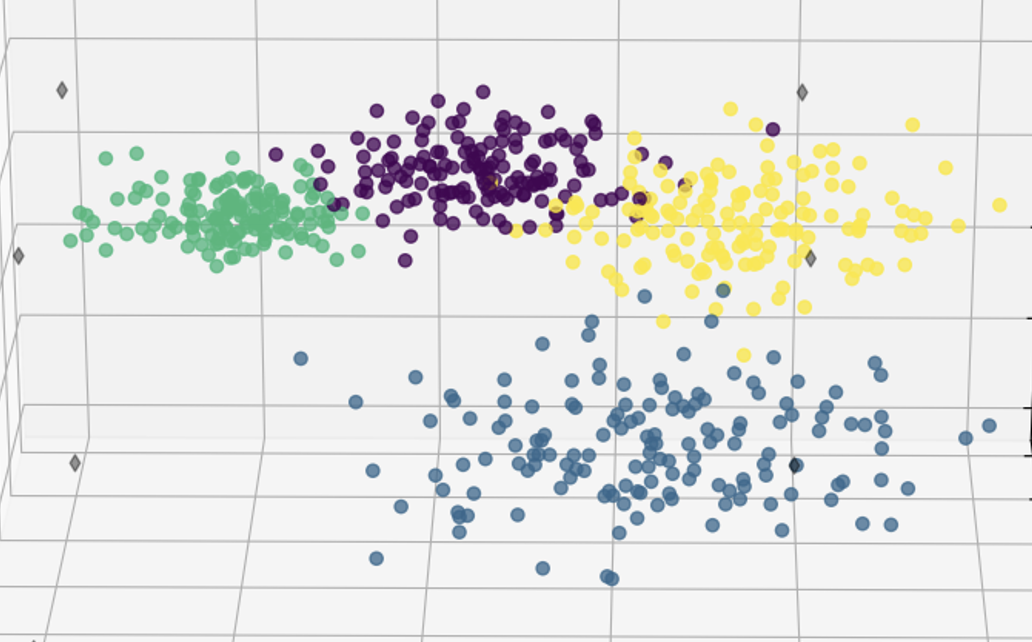

In [460]:
# class 1
t2_class1_x = np.random.normal(loc=2.0, scale=0.5, size=300)
t2_class1_y = np.random.normal(loc=2.0, scale=0.5, size=300)
t2_class1_labels = np.zeros(300, dtype=int)

# class 2
t2_class2_x = np.random.normal(loc=3.0, scale=0.5, size=300)
t2_class2_y = np.random.normal(loc=3.0, scale=0.5, size=300)
t2_class2_labels = np.ones(300, dtype=int)

# class 3
t2_class3_x = np.random.normal(loc=4.0, scale=0.5, size=300)
t2_class3_y = np.random.normal(loc=2.0, scale=0.5, size=300)
t2_class3_labels = np.full(300, 2, dtype=int)

data = {
    'x': np.concatenate((t2_class1_x, t2_class2_x, t2_class3_x)),
    'y': np.concatenate((t2_class1_y, t2_class2_y, t2_class3_y)),
    'Class': np.concatenate((t2_class1_labels, t2_class2_labels, t2_class3_labels))
}

df = pd.DataFrame(data)

df.to_csv('task2.csv', index=False)

In [461]:
t2_df = pd.read_csv("task2.csv")
print(t2_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       900 non-null    float64
 1   y       900 non-null    float64
 2   Class   900 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 21.2 KB
None


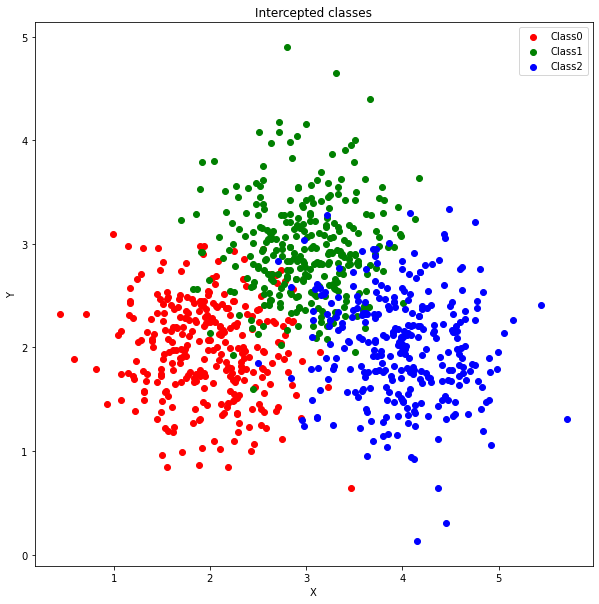

In [462]:
plt.figure(figsize=(10, 10))
colors = ["red", "green", "blue"]

for i in range(3):
    plt.scatter(t2_df[t2_df["Class"] == i]["x"], t2_df[t2_df["Class"] == i]["y"], color=colors[i], label="Class" + str(i))

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Intercepted classes')
plt.legend()

In [463]:
#code

**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

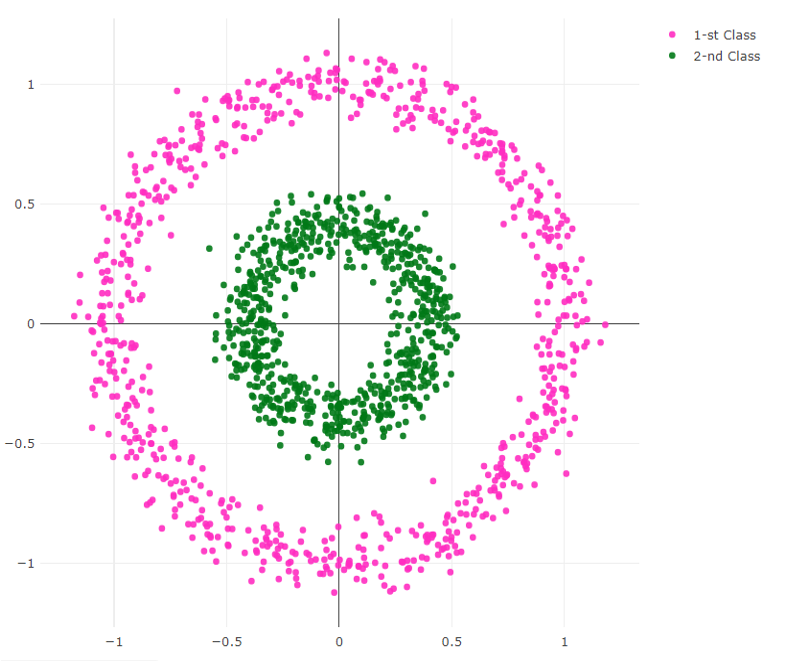

In [464]:
# class 0
t3_x_class_1 = []
t3_y_class_1 = []
r = 1

class0 = np.zeros(300, dtype=int)

for i in range(300):
    theta = np.random.uniform(0, 2 * np.pi)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    
    deviation_x = np.random.uniform(0, 0.1)
    deviation_y = np.random.uniform(0, 0.1)
    
    new_x = x * (1 + deviation_x)
    new_y = y * (1 + deviation_y)
    
    t3_x_class_1.append(new_x)
    t3_y_class_1.append(new_y)

In [465]:
# class 1
t3_x_class_2 = []
t3_y_class_2 = []
r = 2

class1 = np.ones(300, dtype=int)

for i in range(300):
    theta = np.random.uniform(0, 2 * np.pi)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    
    deviation_x = np.random.uniform(0, 0.1)
    deviation_y = np.random.uniform(0, 0.1)
    
    new_x = x * (1 + deviation_x)
    new_y = y * (1 + deviation_y)
    
    t3_x_class_2.append(new_x)
    t3_y_class_2.append(new_y)

In [466]:
data = {
    'x': np.concatenate((t3_x_class_1, t3_x_class_2)),
    'y': np.concatenate((t3_y_class_1, t3_y_class_2)),
    'class': np.concatenate((class0, class1))
}

df = pd.DataFrame(data)

df.to_csv('task3.csv', index=False)

In [467]:
t3_df = pd.read_csv('task3.csv')

print(t3_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       600 non-null    float64
 1   y       600 non-null    float64
 2   class   600 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 14.2 KB
None


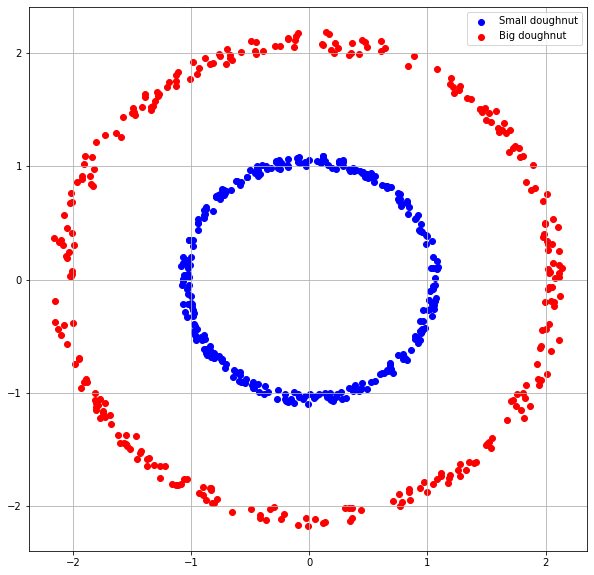

In [468]:
plt.figure(figsize=(10, 10))

plt.scatter(t3_df[t3_df['class'] == 0]['x'], t3_df[t3_df['class'] == 0]['y'], color='blue', label='Small doughnut')
plt.scatter(t3_df[t3_df['class'] == 1]['x'], t3_df[t3_df['class'] == 1]['y'], color='red', label='Big doughnut')
plt.legend()
plt.grid()
plt.show()

**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

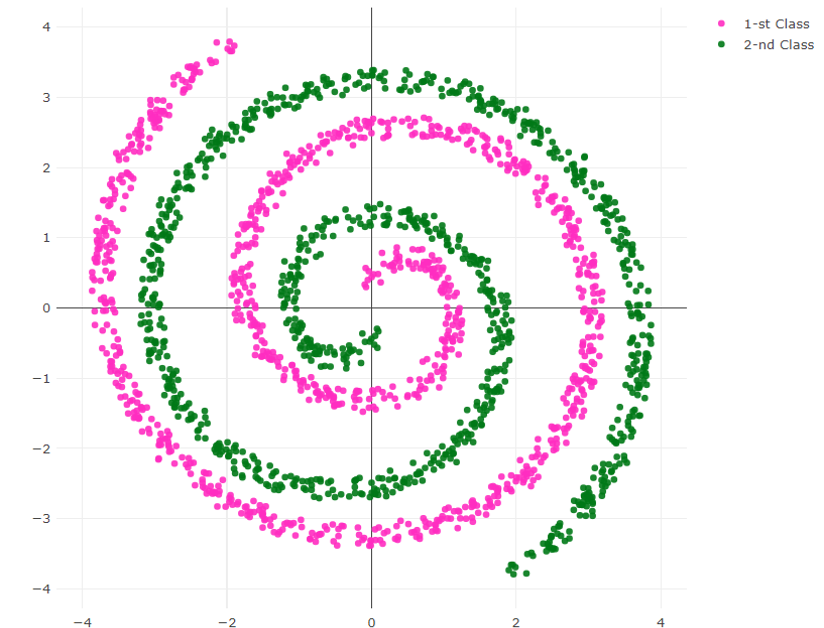

In [469]:
samples = 500
deviation = 0.2
turns = 2

theta1 = np.random.uniform(0, turns * 2 * np.pi, samples)
theta2 = np.random.uniform(0, turns * 2 * np.pi, samples)


t4_x1 = theta1 * np.cos(theta1) + np.random.normal(0, deviation, samples)
t4_y1 = theta1 * np.sin(theta1) + np.random.normal(0, deviation, samples)

t4_x2 = -1 * theta2 * np.cos(theta2) + np.random.normal(0, deviation, samples)
t4_y2 = -1 * theta2 * np.sin(theta2) + np.random.normal(0, deviation, samples)

class0 = np.zeros(samples, dtype=int)
class1 = np.ones(samples, dtype=int)

In [470]:
data = {
    'x': np.concatenate((t4_x1, t4_x2)),
    'y': np.concatenate((t4_y1, t4_y2)),
    'class': np.concatenate((class0, class1))
}

df = pd.DataFrame(data)
df.to_csv('task4.csv', index=False)

In [471]:
t4_df = pd.read_csv('task4.csv')
print(t4_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
 2   class   1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB
None


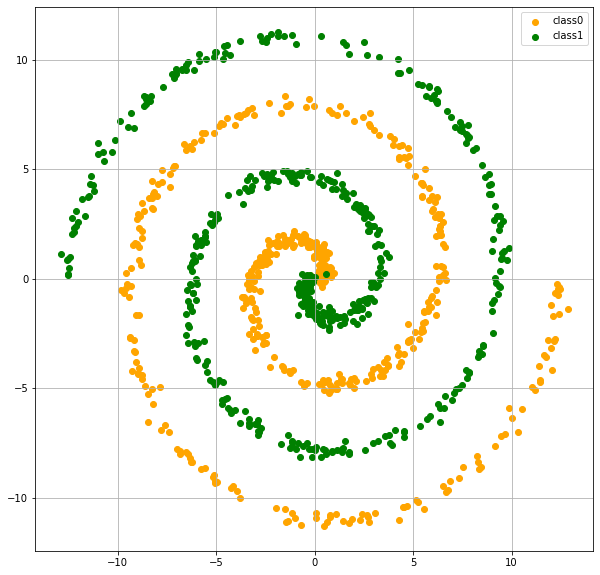

In [472]:
plt.figure(figsize=(10,10))

plt.scatter(t4_df[t4_df["class"]==0]["x"], t4_df[t4_df["class"]==0]["y"], color="orange", label="class0")
plt.scatter(t4_df[t4_df["class"]==1]["x"], t4_df[t4_df["class"]==1]["y"], color="green", label="class1")
plt.grid()
plt.legend()
plt.show()

**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

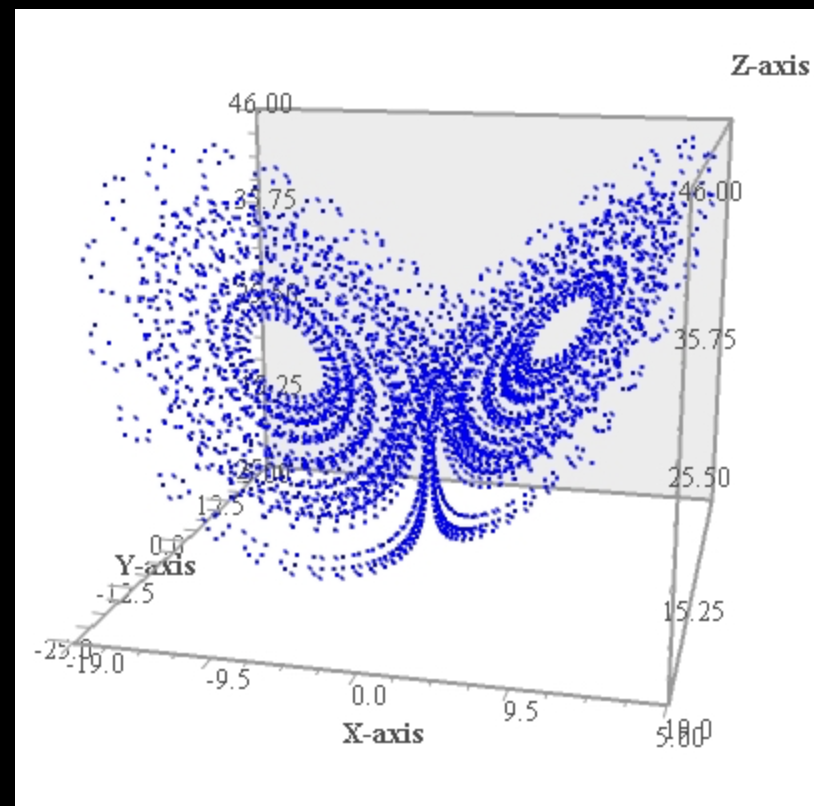

In [473]:
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

In [474]:
def lorenz_system(current_state, t):
    x, y, z = current_state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

In [475]:
starting_point = [0.0, 2.0, 3.0]

t = np.linspace(0, 50, 2000)
solution = odeint(lorenz_system, starting_point, t)

x = solution[:, 0]
y = solution[:, 1]
z = solution[:, 2]

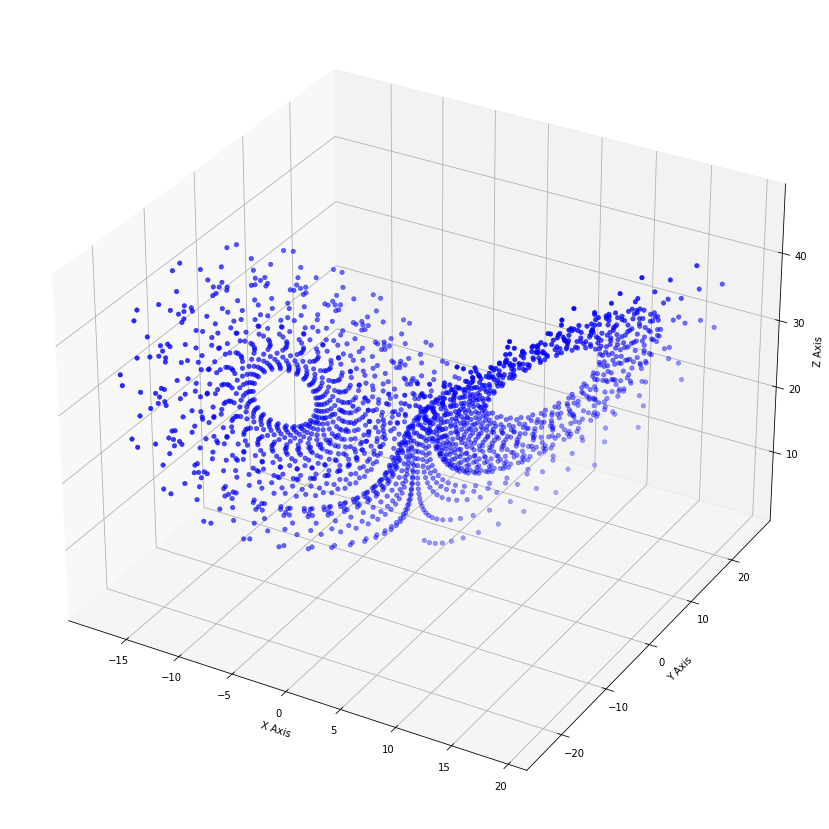

In [476]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, lw=0.5, color='blue')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

For this data has been chosed "standart" set of data and the output is as expected.

In [477]:
# Lets double the sigma value
sigma = 10.0 * 2
rho = 28.0
beta = 8.0 / 3.0

In [478]:
def lorenz_system(current_state, t):
    x, y, z = current_state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

In [479]:
starting_point = [0.0, 2.0, 3.0]

t = np.linspace(0, 50, 2000)
solution = odeint(lorenz_system, starting_point, t)

x = solution[:, 0]
y = solution[:, 1]
z = solution[:, 2]

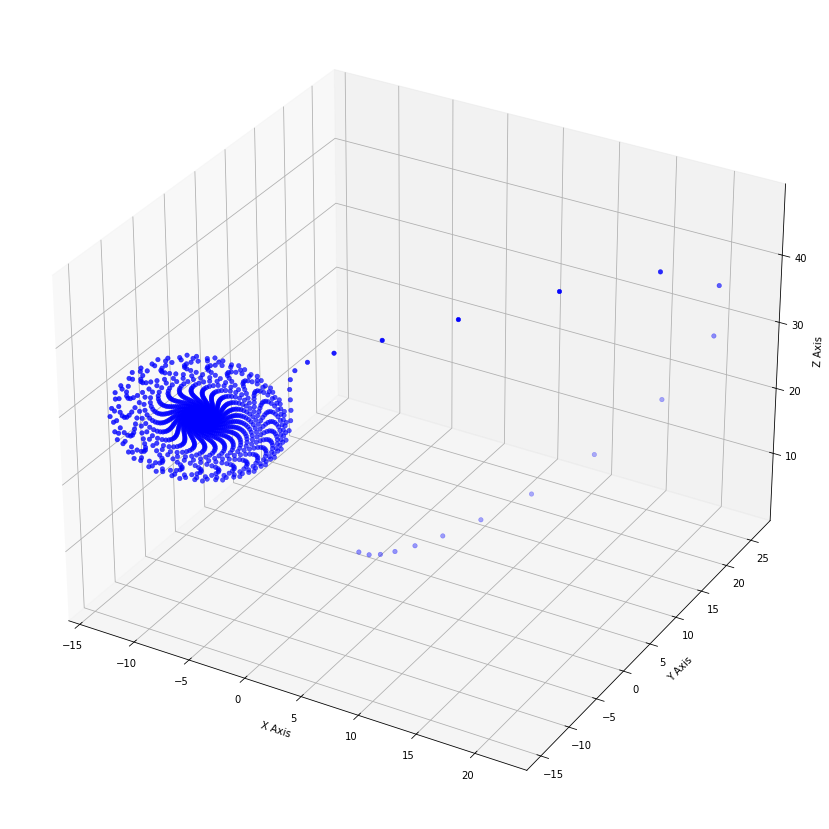

In [480]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, lw=0.5, color='blue')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

The output is surprising. Right "wing" has only 20 points, considering that I use 2000 points for this experiment, this means that 99% of the values are in the left wing. Also, what's interesting is that left wing is much smaller then the right one and a void is absent.

In [549]:
sigma = 10.0
# multiply rho by 2
rho = 28.0 * 2
beta = 8.0 / 3.0

In [550]:
def lorenz_system(current_state, t):
    x, y, z = current_state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

In [551]:
starting_point = [0.0, 2.0, 3.0]

t = np.linspace(0, 50, 2000)
solution = odeint(lorenz_system, starting_point, t)

x = solution[:, 0]
y = solution[:, 1]
z = solution[:, 2]

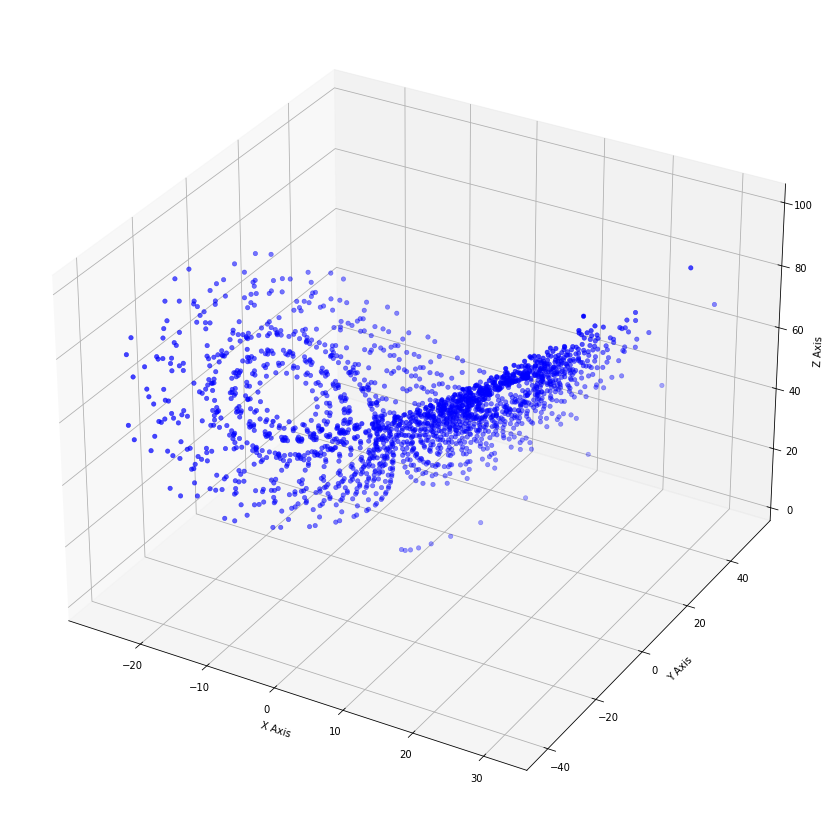

In [552]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, lw=0.5, color='blue')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

Seems like the values are more chaotic this time. Voids in the center of the wings are smaller, also the spiral character is more prominent. Also seems that more points are on the rights wing then before.

In [657]:
sigma = 10.0
rho = 28.0 
# multiply beta by 2
beta = 2 * 8.0 / 3.0

In [658]:
def lorenz_system(current_state, t):
    x, y, z = current_state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

In [659]:
starting_point = [0.0, 2.0, 3.0]

t = np.linspace(0, 50, 2000)
solution = odeint(lorenz_system, starting_point, t)

x = solution[:, 0]
y = solution[:, 1]
z = solution[:, 2]

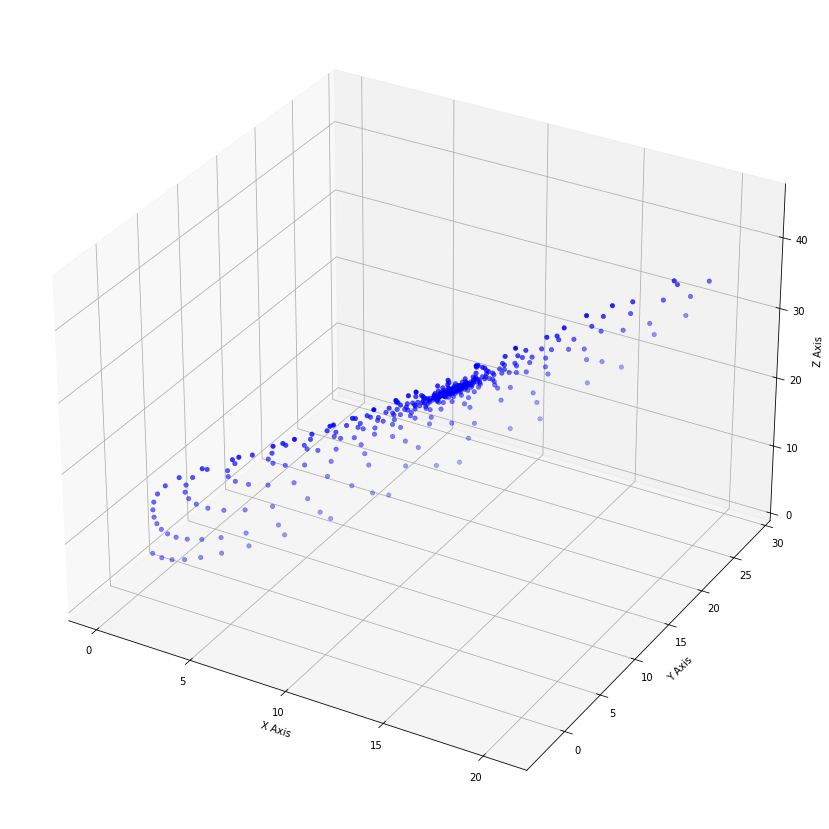

In [660]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, lw=0.5, color='blue')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

As the result is hard to describe, let's change it by the smaller value. 

In [1037]:
sigma = 10.0
rho = 28.0 
# multiply beta by 2
beta = 1.2 * 8.0 / 3.0

In [1038]:
def lorenz_system(current_state, t):
    x, y, z = current_state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

In [1039]:
starting_point = [0.0, 2.0, 3.0]

t = np.linspace(0, 50, 2000)
solution = odeint(lorenz_system, starting_point, t)

x = solution[:, 0]
y = solution[:, 1]
z = solution[:, 2]

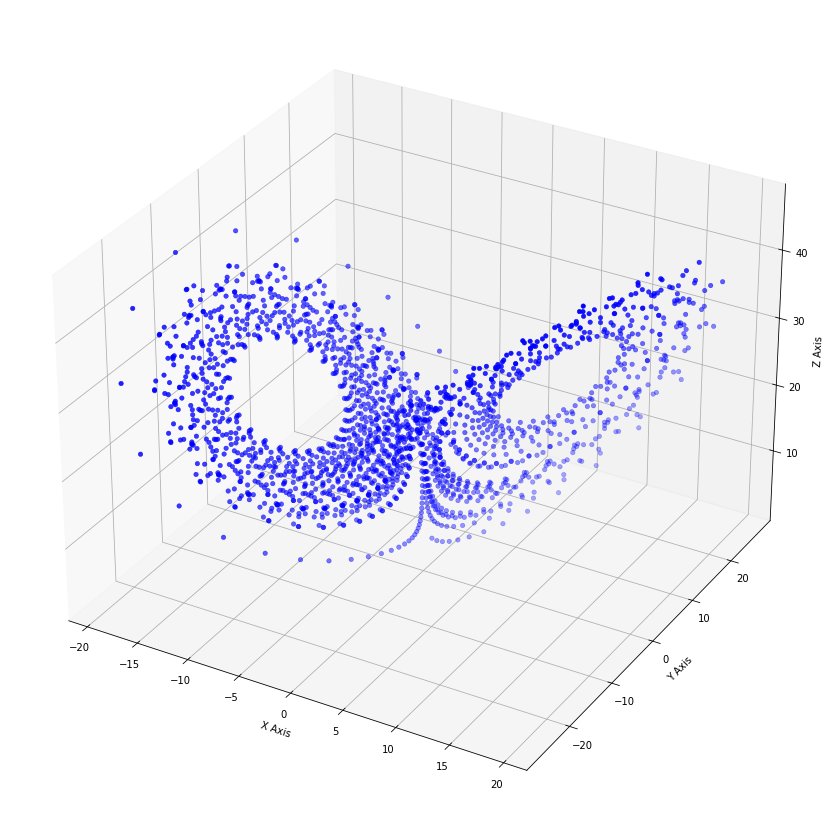

In [1040]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, lw=0.5, color='blue')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

Hard to tell what's exactly changing. Seems a lot like a rho multiplied by two, also spiral effect is kind of dissapearing.

In [1041]:
sigma = 10.0 / 1.5
rho = 28.0 * 4.5
beta = 8.0 / 3.0 * 2

In [1042]:
def lorenz_system(current_state, t):
    x, y, z = current_state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

In [1043]:
starting_point = [0.0, 2.0, 3.0]

t = np.linspace(0, 50, 2000)
solution = odeint(lorenz_system, starting_point, t)

x = solution[:, 0]
y = solution[:, 1]
z = solution[:, 2]

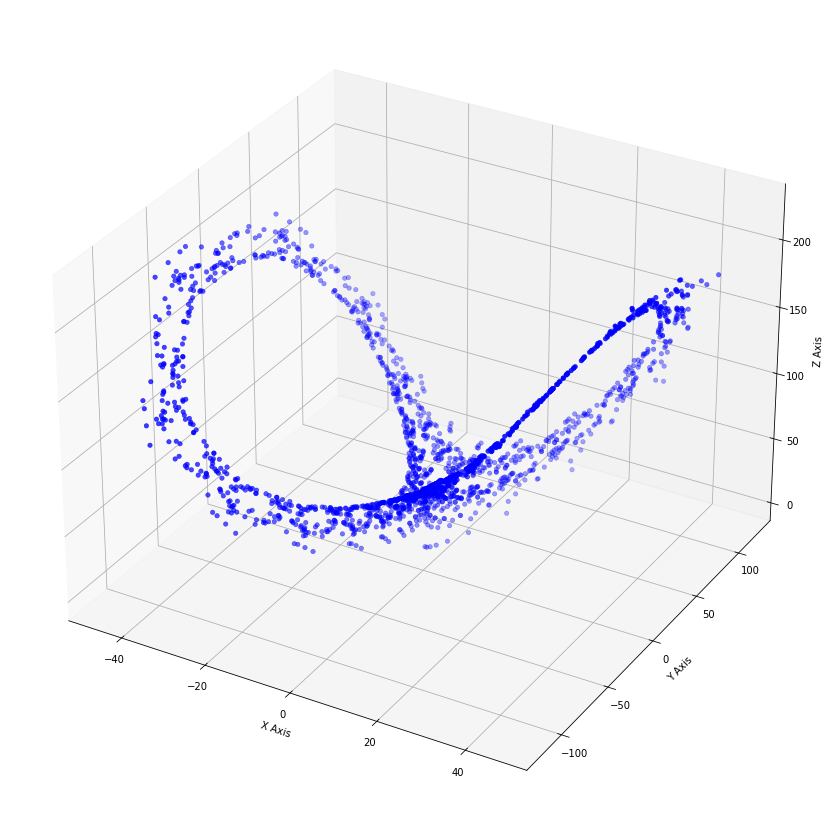

In [1044]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, lw=0.5, color='blue')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

just looks cool lol